# Solución de una ecuación diferencial usando una ANN

$$
\frac{d\psi}{dx} + \left(x + \frac{1 + 3x^{2}}{1 + x + x^{3}} \right)\psi = x^{3} + 2x + x^{2}\left(\frac{1 + 3x^{2}}{1 + x + x^{3}}\right)
$$
Con CI: $\psi(0) = 1$ \
$x \in [0,2]$

## Métodos clásicos:
Considere la ecuación diferencial
$$
\dot u(t) = f(u, t) \\
u(0) = u_0  \\
t \in [0, T]
$$
#### Método Forward Euler (explícito)
Aproximamos la derivada $\dot u$ por una diferencia finita (hacia adelante):
$$
\dot u = \frac{du}{dt} \thickapprox \frac{u(t + dt) - u(t) }{dt}
$$
Entonces el método resulta:
$$
u^{n+1} = u^{n} + \Delta t f(u^n , t_n)
$$

Este método es de primer orden, por lo que el error es proporcional a $\Delta t$

#### Método RK3 (explícito)
$$
u ^{n+1} = u^n + \frac{\Delta t}{6} (k_1 + 4k_2 + k_3) \\
k_1 = f(u^n, t_n) \\
k_2 = f(u^n + \frac{\Delta t}{2}, t_n + \frac{\Delta t}{2}) \\
k_3 = f(u^n - \Delta t k_1 + 2\Delta t k_2, t_n + \Delta t)
$$

Este método es de tercer orden, por lo que el error es proporcional a $(\Delta t )^3$


#### Método RK4 (explícito)
Usando la regla de Simpson:
$$
u ^{n+1} = n^{n} + \frac{\Delta t}{6} (f^n + 2f_1 ^{n+\frac{1}{2}} + 2f_2 ^{n+\frac{1}{2}} + f_3 ^{n+1} )
$$
con
$$
f_1 ^{n+\frac{1}{2}} = f(u^n + \frac{1}{2}\Delta t f^n, t_{n+\frac{1}{2}}) \\
f_2 ^{n+\frac{1}{2}} = f(u^n + \frac{1}{2}\Delta t f_1 ^{n+\frac{1}{2}}, t_{n+\frac{1}{2}}) \\
f_3 ^{n+1} = f(u^n + \Delta t f_2 ^{n+\frac{1}{2}}, t_{n+\frac{1}{2}}) 
$$

Este método es de cuarto orden, por lo que el error es proporcional a $(\Delta t )^4$

In [126]:
import matplotlib.pyplot as plt
import autograd.numpy as np
from autograd import grad 
import autograd.numpy.random as npr
from autograd.core import primitive
import networkx as nx

### Usando diferencias finitas

__Forward Euler__

In [127]:
def FE(f, U_0, dt, T):
    N_t = int(round(T/dt))
    u = np.zeros(N_t + 1)
    t = np.linspace(0, N_t * dt, len(u))
    u[0] = U_0
    # FE
    for n in range(N_t):
        u[n+1] = u[n] + dt*f(u[n], t[n])
    return u, t

__Runge-Kutta 3__

In [128]:
def RK3(f, U_0, dt, T):
    N_t = int(round(T/dt))
    t = np.linspace(0, N_t*dt, N_t + 1)
    u = np.zeros(N_t +1)
    # Initial condition
    u[0] = U_0
    # RK3
    for n in range(N_t):
        k1 = f(u[n],t[n])
        k2 = f(u[n] + 0.5*dt, t[n]+ 0.5*dt)
        k3 = f(u[n] - dt*k1 + 2*dt*k2, t[n] + dt)
        u[n+1] = u[n] + (1./6.)*dt*(k1 + 4*k2 + k3)
    return u, t

__Runge-Kutta 4__

In [129]:
def RK4(f, X_0, dt, T):
    N_t = int(round(T/dt))
    u = np.zeros((N_t+1,len(X_0))) 
    t = np.linspace(0, N_t*dt, len(u))
    # Initial conditions
    for j in range(len(X_0)):
        u[j,0] = X_0[j]
    # RK4
    for n in range(N_t):
        u1 = f(u[n] + 0.5*dt* f(u[n], t[n]), t[n] + 0.5*dt)
        u2 = f(u[n] + 0.5*dt*u1, t[n] + 0.5*dt)
        u3 = f(u[n] + dt*u2, t[n] + dt)
        u[n+1] = u[n] + (1/6)*dt*( f(u[n], t[n]) + 2*u1 + 2*u2 + u3)
    return u, t

__Definimos la ecuación diferencial a resolver__

In [130]:
def A(x):
    return x + (1. + 3.*x**2) / (1. + x + x**3)

def B(x):
    return x**3 + 2.*x + x**2 * ((1. + 3.*x**2) / (1. + x + x**3))

def f(psi, x):
    return B(x) - psi * A(x)

__Solución analítica__

In [131]:
def psy_analytic(x):
    return (np.exp((-x**2)/2.))/(1. + x + x**3) + x**2

__Solución usando los métodos anteriores__

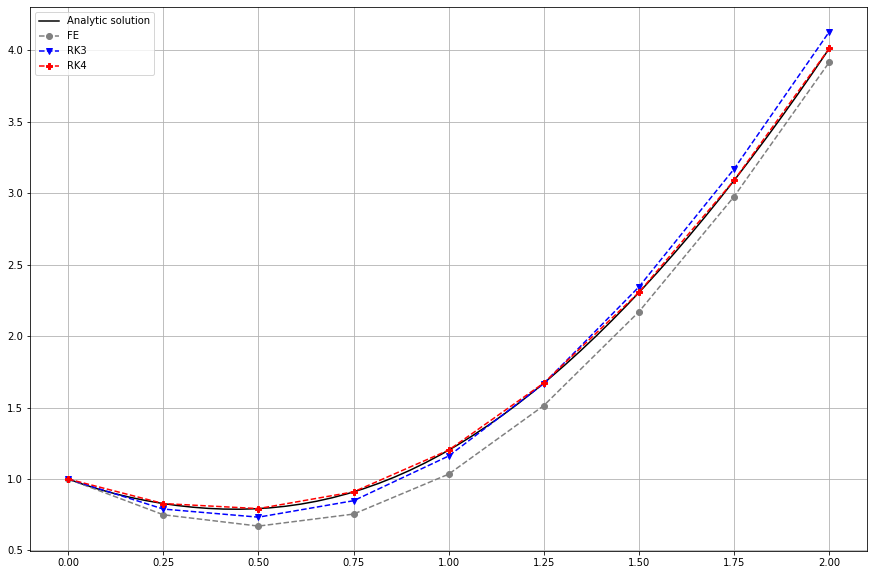

In [132]:
# Método RK 4
CI = 1,
sol_RK4, _ = RK4(f, CI, 0.25, 2)

# Método RK 3
sol_RK3, _ = RK3(f, 1, 0.25, 2)

# Método FE
sol_FE, _ = FE(f, 1, 0.25, 2)

x = np.linspace(0, 2, 9)

x_dom = np.linspace(0, 2)
fig = plt.subplots(figsize=(15, 10))
plt.plot(x_dom, psy_analytic(x_dom), color='black', label='Analytic solution')
plt.plot(x, sol_FE, color='gray', marker='o', linestyle='dashed', label='FE')
plt.plot(x, sol_RK3, color='blue', marker='v', linestyle='dashed', label='RK3')
plt.plot(x, sol_RK4, color='red', marker='P', linestyle='dashed', label='RK4')
plt.legend()
plt.grid(True)
plt.show()

__Grafica de los errores__

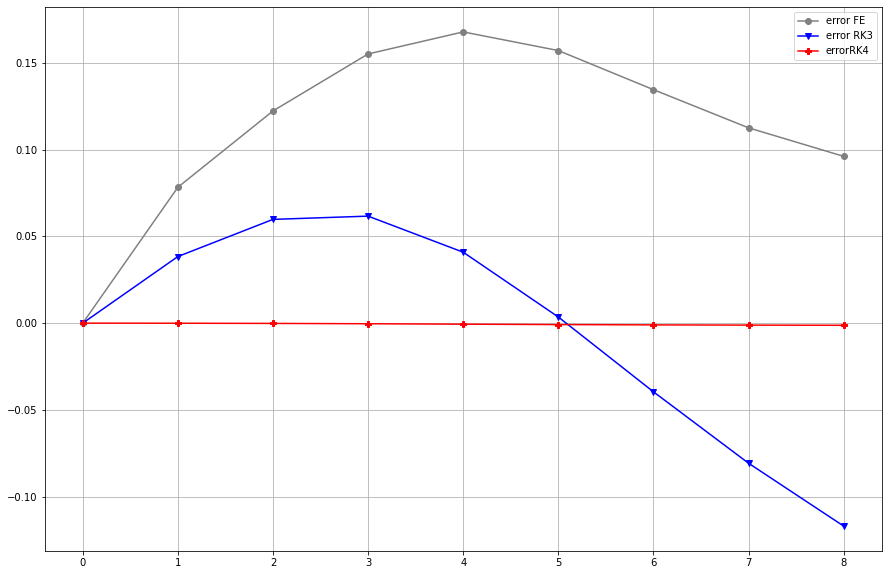

In [133]:
err_FE = psy_analytic(x) - sol_FE
err_RK3 = psy_analytic(x) - sol_RK3
err_RK4 = psy_analytic(x) - np.squeeze(sol_RK4)

fig = plt.subplots(figsize=(15, 10))
plt.plot(err_FE, color='gray', marker='o', label='error FE')
plt.plot(err_RK3, color='blue', marker='v', label='error RK3')
plt.plot(err_RK4, color='red', marker='P', label='errorRK4')

plt.legend()
plt.grid(True)
plt.show()

In [134]:
err_RK4

array([ 0.00000000e+00, -4.55748520e-05, -1.56949196e-04, -3.46045077e-04,
       -5.93548830e-04, -8.27440738e-04, -1.00381859e-03, -1.13211360e-03,
       -1.24250269e-03])

## Usando ANN

__Vamos a implementar la siguiente red neuronal__

In [135]:
class Network(object):
    def __init__(self,sizes):
        self.num_layers = len(sizes)
        print("It has", self.num_layers - 1, "layers,")
        self.sizes = sizes
        print("with the following number of nodes per layer",self.sizes)
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(sizes[:-1], sizes[1:])]
        
    def feedforward(self, x_of_sample):
        """Return the output of the network F(x_of_sample) """        
        for b, w in zip(self.biases, self.weights):
            x_of_sample = sigmoid(np.dot(w, x_of_sample)+b)
        return x_of_sample
    
    def graph(self,sizes):
        a=[]
        ps={}
        Q = nx.Graph()
        for i in range(len(sizes)):
            Qi=nx.Graph()    
            n=sizes[i]
            nodos=np.arange(n)
            Qi.add_nodes_from(nodos)
            l_i=Qi.nodes
            Q = nx.union(Q, Qi, rename = (None, 'Q%i-'%i))
            if len(l_i)==1:
                ps['Q%i-0'%i]=[i/(len(sizes)), 1/2]
            else:
                for j in range(len(l_i)+1):
                    ps['Q%i-%i'%(i,j)]=[i/(len(sizes)),(1/(len(l_i)*len(l_i)))+(j/(len(l_i)))]
            a.insert(i,Qi)
        for i in range(len(a)-1):
            for j in range(len(a[i])):
                for k in range(len(a[i+1])):
                    Q.add_edge('Q%i-%i' %(i,j),'Q%i-%i' %(i+1,k))            
        nx.draw(Q, pos = ps)

It has 2 layers,
with the following number of nodes per layer [1, 10, 1]


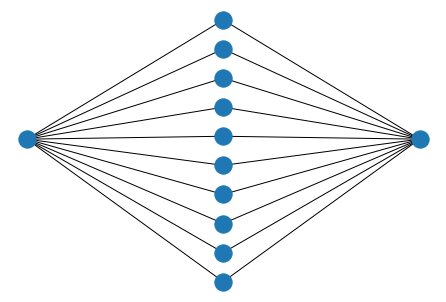

In [136]:
layers = [1, 10, 1]
net = Network(layers)
net.graph(layers)

In [137]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x)) # logística

def sigmoid_grad(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [138]:
def neural_network(W, x):
    R = np.dot(x, W[0])
    R = sigmoid(R)
    R = np.dot(R, W[1])
    return R

def d_neural_network_dx(W, x, k=1):
    return np.dot(np.dot(W[1].T, W[0].T**k), sigmoid_grad(x))

In [139]:
def loss_function(W, x):
    loss_sum = 0.
    for xi in x: 
        net_out = neural_network(W, xi)[0][0]
        psy_t = 1. + xi * net_out # ANN trial solution
        
        d_net_out = d_neural_network_dx(W, xi)[0][0]
        d_psy_t = net_out + xi * d_net_out # ANN trial derivate
        
        func = f(psy_t, xi)      
        err_sqr = (d_psy_t - func)**2 # Función de pérdida

        loss_sum += err_sqr
    return loss_sum

In [146]:
npr.seed(4)
W = [npr.randn(1, 8), npr.randn(8,1)] # [W[0], W[1]]

lr = 0.003 # Learning rate
epochs = 4000

for i in range(epochs):
    loss_grad = grad(loss_function)(W, x)

    # Descenso de gradiente 
    W[0] = W[0] - lr * loss_grad[0]
    W[1] = W[1] - lr * loss_grad[1]

In [147]:
ANN_sol = [1 + xi * neural_network(W, xi)[0][0] for xi in x]

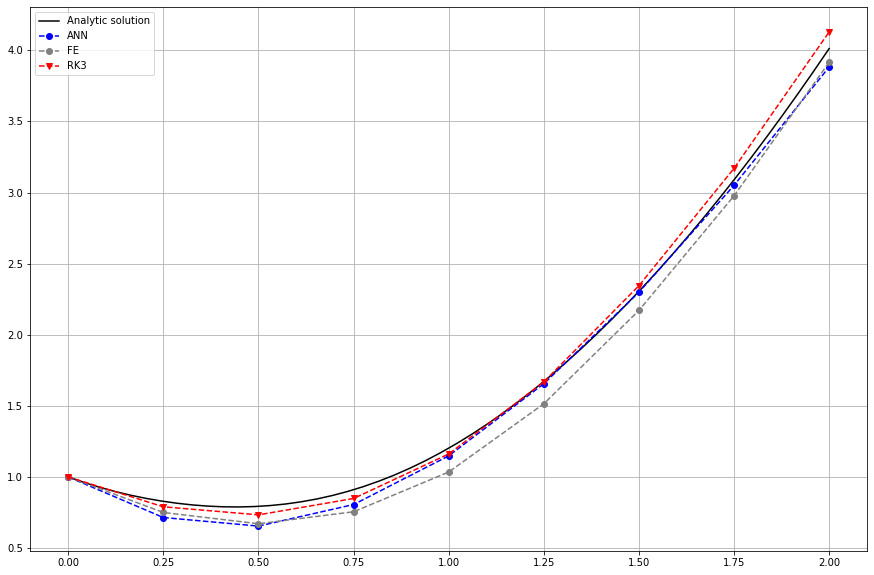

In [148]:
fig = plt.subplots(figsize=(15, 10))
plt.plot(x_dom, psy_analytic(x_dom), color='black', label='Analytic solution')
plt.plot(x, ANN_sol, color='blue', marker='o', linestyle='dashed', label='ANN')
plt.plot(x, sol_FE, color='gray', marker='o', linestyle='dashed', label='FE')
plt.plot(x, sol_RK3, color='red', marker='v', linestyle='dashed', label='RK3')
#plt.plot(x, sol_RK4, color='red', marker='P', linestyle='dashed', label='RK4')
plt.legend()
plt.grid(True)
plt.show()

In [149]:
print(loss_function(W, x))

3.158493840150773


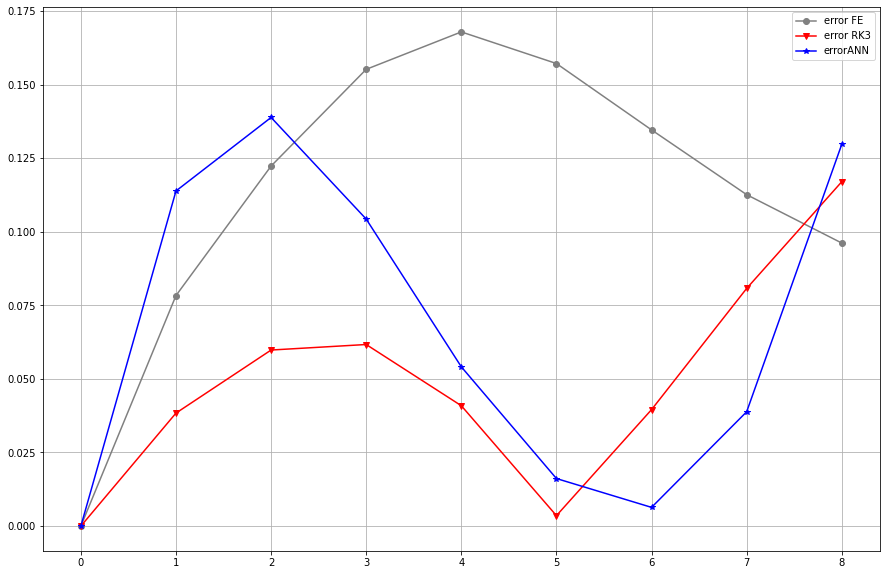

In [150]:
err_FE = psy_analytic(x) - sol_FE
err_RK3 = psy_analytic(x) - sol_RK3
#err_RK4 = psy_analytic(x) - np.squeeze(sol_RK4)
err_ANN = psy_analytic(x) - ANN_sol

fig = plt.subplots(figsize=(15, 10))
plt.plot(abs(err_FE), color='gray', marker='o', label='error FE')
plt.plot(abs(err_RK3), color='red', marker='v', label='error RK3')
#plt.plot(err_RK4, color='red', marker='P', label='errorRK4')
plt.plot(abs(err_ANN), color='blue', marker='*', label='errorANN')

plt.legend()
plt.grid(True)
plt.show()